Unsupervised learning is a type of machine learning where the model is trained on input data without labeled responses. In contrast to supervised learning, where the algorithm is trained on a labeled dataset (input-output pairs), unsupervised learning deals with unlabeled data, seeking to find hidden structure or patterns within the data itself. Here's a detailed explanation of unsupervised learning:

1. **Objective**:
   - The primary goal of unsupervised learning is to infer the natural structure present within a set of data points. This could involve finding clusters of similar data points, detecting outliers, reducing the dimensionality of the data, or discovering patterns that can later be used for further analysis.

2. **Clustering**:
   - Clustering algorithms group similar data points together based on some similarity or distance measure. The aim is to partition the data into distinct groups or clusters such that data points within the same cluster are more similar to each other than to those in other clusters. Common clustering algorithms include K-means, hierarchical clustering, and DBSCAN.

3. **Dimensionality Reduction**:
   - Unsupervised learning techniques are also used for dimensionality reduction, which involves reducing the number of features (or dimensions) in a dataset while preserving its essential structure. Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) are popular methods for dimensionality reduction.

4. **Anomaly Detection**:
   - Another application of unsupervised learning is anomaly detection, where the algorithm identifies data points that deviate significantly from the norm or expected behavior. Anomalies may indicate errors, outliers, or interesting patterns in the data. One common approach for anomaly detection is the use of autoencoders, a type of neural network.

5. **Association Rule Learning**:
   - Unsupervised learning techniques are also employed in association rule learning, where the goal is to discover interesting relationships or associations among variables in large datasets. One widely used algorithm for this purpose is the Apriori algorithm, which finds frequent itemsets and generates association rules based on their occurrence.

6. **Density Estimation**:
   - Density estimation involves estimating the probability density function of the underlying distribution of the data. This can be useful for modeling and understanding the distribution of data in a dataset. Gaussian Mixture Models (GMMs) and kernel density estimation are common techniques used for density estimation.

7. **Challenges**:
   - Unsupervised learning poses several challenges, including the absence of ground truth labels for evaluation, the subjective nature of interpreting results, and the difficulty in assessing the quality of the learned representations. Moreover, the success of unsupervised learning heavily depends on the choice of algorithm, hyperparameters, and preprocessing steps.

8. **Applications**:
   - Unsupervised learning finds applications across various domains, including but not limited to:
     - Customer segmentation in marketing
     - Anomaly detection in cybersecurity
     - Image and document clustering in information retrieval
     - Dimensionality reduction for visualization
     - Recommendation systems in e-commerce

In summary, unsupervised learning techniques play a crucial role in exploring and uncovering patterns, relationships, and structures within unlabeled data, contributing to a wide range of applications in machine learning and data analysis.

K-means clustering is a popular unsupervised learning algorithm used for partitioning a dataset into a set of K distinct, non-overlapping clusters. Here's how K-means works:

1. **Initialization**:
   - The algorithm starts by randomly initializing K cluster centroids. These centroids represent the centers of the clusters that we aim to identify within the dataset.

2. **Assigning Data Points to Clusters**:
   - Each data point in the dataset is then assigned to the nearest cluster centroid based on a distance metric, typically Euclidean distance. The data points are assigned to the cluster whose centroid is closest to them.

3. **Updating Cluster Centroids**:
   - After assigning each data point to a cluster, the centroids of the clusters are recomputed. The new centroids are calculated as the mean of all data points assigned to each cluster. This step effectively moves the centroids to the center of their respective clusters.

4. **Iterative Process**:
   - Steps 2 and 3 are repeated iteratively until convergence. Convergence occurs when the centroids no longer change significantly between iterations or when a predefined number of iterations is reached.

5. **Final Clustering**:
   - Once the algorithm converges, each data point remains assigned to the cluster whose centroid it is closest to. This results in a partitioning of the dataset into K clusters.

6. **Choosing K**:
   - The number of clusters K is typically specified by the user. However, determining the optimal value of K can be challenging. Common approaches include using domain knowledge, the "elbow method" by plotting the within-cluster sum of squares against the number of clusters, or more sophisticated techniques like the silhouette method.

K-means is computationally efficient and works well for datasets with a large number of samples. However, it has some limitations, such as its sensitivity to the initial placement of centroids and its tendency to converge to local optima. To mitigate these issues, it's common to run the algorithm multiple times with different initializations and choose the clustering with the lowest total within-cluster variance. Additionally, variations of K-means, such as K-means++, have been proposed to improve the quality of the initial centroids.

### Inertia
Recall the first property of clusters we covered above. This is what inertia evaluates. It tells us how far the points within a cluster are. So, inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster. Normally, we use Euclidean distance as the distance metric, as long as most of the features are numeric; otherwise, Manhattan distance in case most of the features are categorical.

We calculate this for all the clusters; the final inertial value is the sum of all these distances. This distance within the clusters is known as intracluster distance. So, inertia gives us the sum of intracluster distances:

### Dunn Index:
We now know that inertia tries to minimize the intracluster distance. It is trying to make more compact clusters.

Let me put it this way – if the distance between the centroid of a cluster and the points in that cluster is small, it means that the points are closer to each other. So, inertia makes sure that the first property of clusters is satisfied. But it does not care about the second property – that different clusters should be as different from each other as possible.

This is where the Dunn index comes into action.

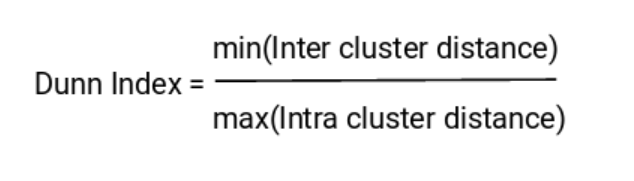

### Silhouette Score
The silhouette score and plot are used to evaluate the quality of a clustering solution produced by the k-means algorithm. The silhouette score measures the similarity of each point to its own cluster compared to other clusters, and the silhouette plot visualizes these scores for each sample. A high silhouette score indicates that the clusters are well separated, and each sample is more similar to the samples in its own cluster than to samples in other clusters. A silhouette score close to 0 suggests overlapping clusters, and a negative score suggests poor clustering solutions.

### k-means working nature
1. Choose the number of clusters k
2. Select k random points from the data as centroids
3. Assign all the points to the closest cluster centroid
4. Recompute the centroids of newly formed clusters
5. Repeat steps 3 and 4

### Stopping Criteria for K-Means Clustering
There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:

Centroids of newly formed clusters do not change

Points remain in the same cluster

Maximum number of iterations is reached

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


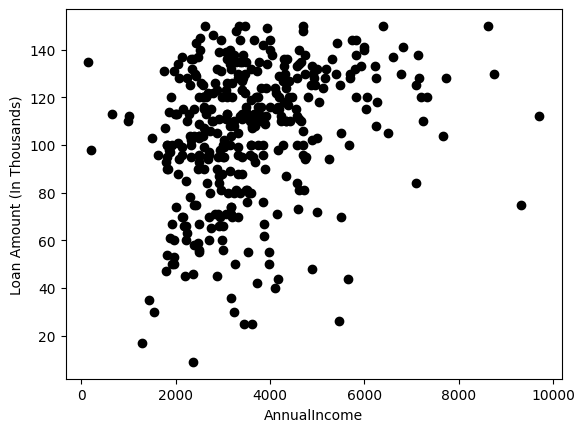

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('clustering.csv')
data.head()


X = data[["LoanAmount","ApplicantIncome",'CoapplicantIncome']]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

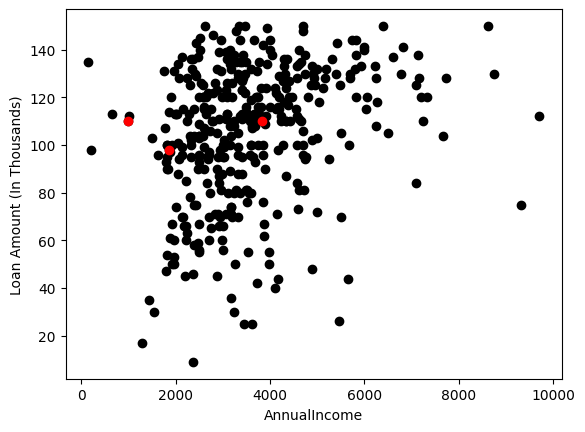

In [21]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [23]:
# Get the cluster centers
centroids = kmeans.cluster_centers_

# Get the labels (cluster assignments for each data point)
labels = kmeans.labels_

In [5]:
centroids

array([[ 109.94193548, 4038.50322581],
       [  97.38251366, 2502.20765027],
       [ 119.48837209, 6512.76744186]])

In [24]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2,
       2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0,
       0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0,

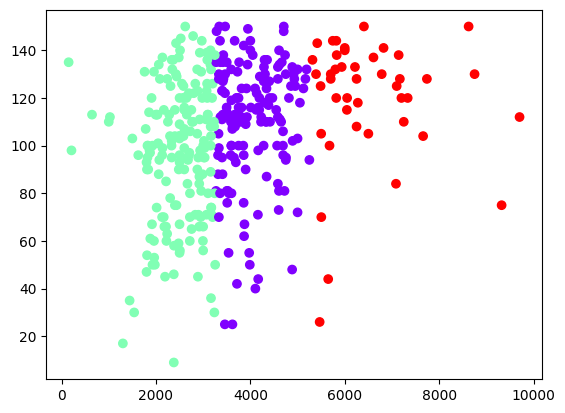

In [25]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['ApplicantIncome'],data_with_clusters['LoanAmount'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

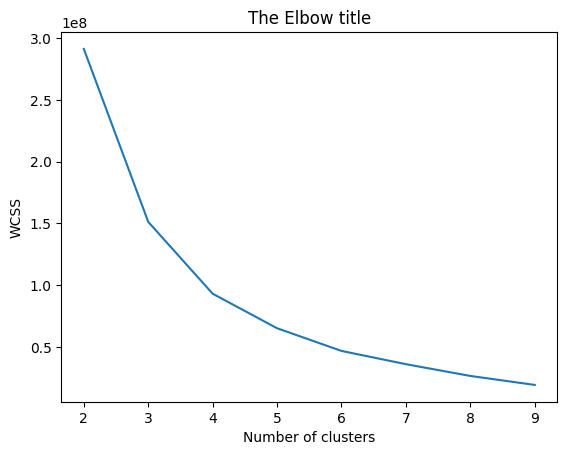

In [28]:
wcss=[]
for i in range(2,10):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(2,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

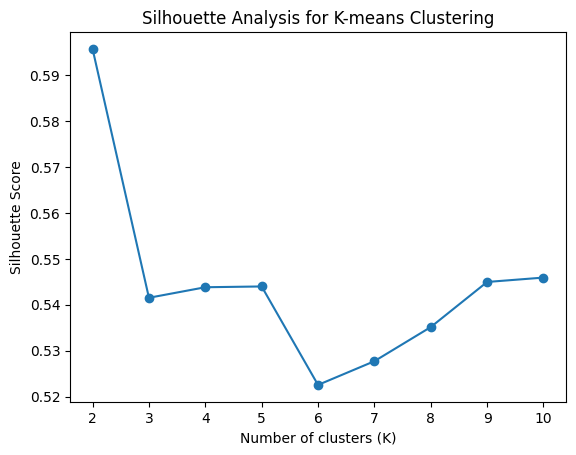

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate K-means clusters for different values of K
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X)  # 'data' is your dataset
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-means Clustering')
plt.show()
